In [1]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=2588b0563054047098186a4b147ade01210b9ae3422435c0a4cb50e7e6ae28f2
  Stored in directory: c:\users\ki\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

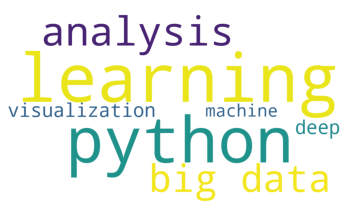

In [7]:
text='''python python python python python python python python
big data big data big data big data big data big data big data big data 
analysis analysis analysis analysis analysis analysis analysis analysis 
visualization visualization visualization visualization visualization 
machine learning machine learning machine learning machine learning 
deep learning deep learning deep learning deep learning deep learning 
'''
wc= WordCloud(width=1000,height=600, background_color='white',random_state=0)
plt.imshow(wc.generate(text))
plt.axis("off")
plt.show()

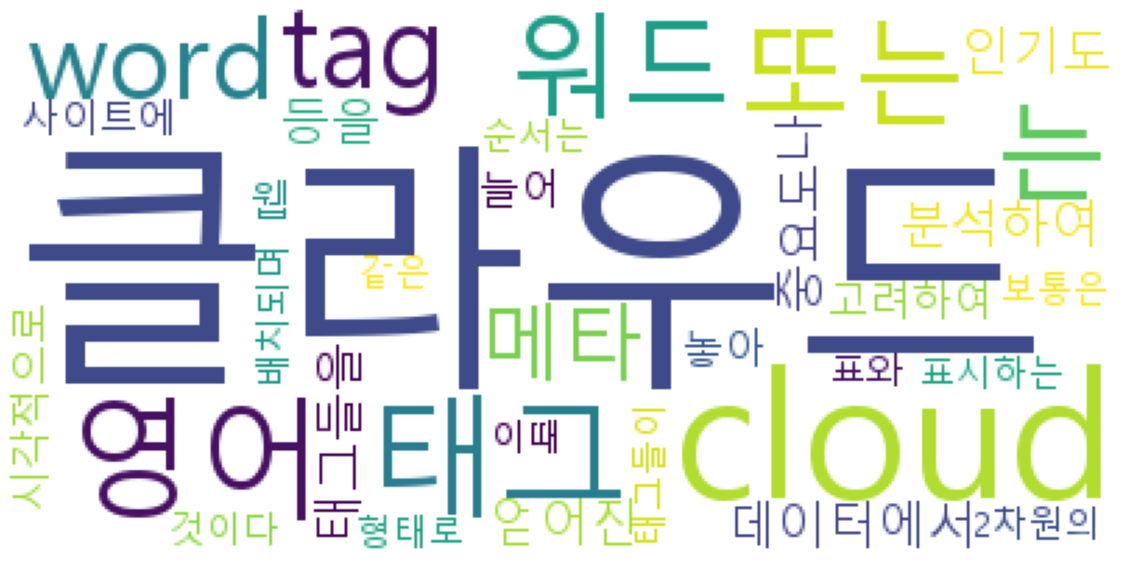

In [11]:
text='태그 클라우드(영어: tag cloud) 또는 워드 클라우드(word cloud)는 메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어 놓아 웹 사이트에 표시하는 것이다. 보통은 2차원의 표와 같은 형태로 태그들이 배치되며 이때 순서는'
wc= WordCloud(background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf"))
plt.figure(figsize=(20,15))
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

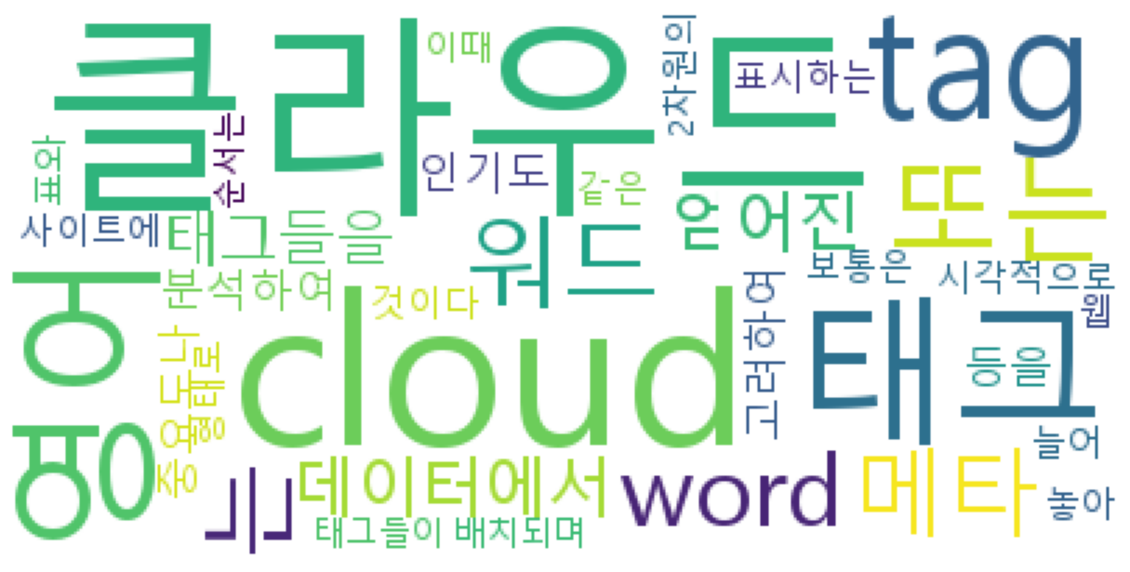

In [15]:
text='태그 클라우드(영어: tag cloud) 또는 워드 클라우드(word cloud)는 메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어 놓아 웹 사이트에 표시하는 것이다. 보통은 2차원의 표와 같은 형태로 태그들이 배치되며 이때 순서는'
wc= WordCloud(background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf"))
plt.figure(figsize=(20,15))
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

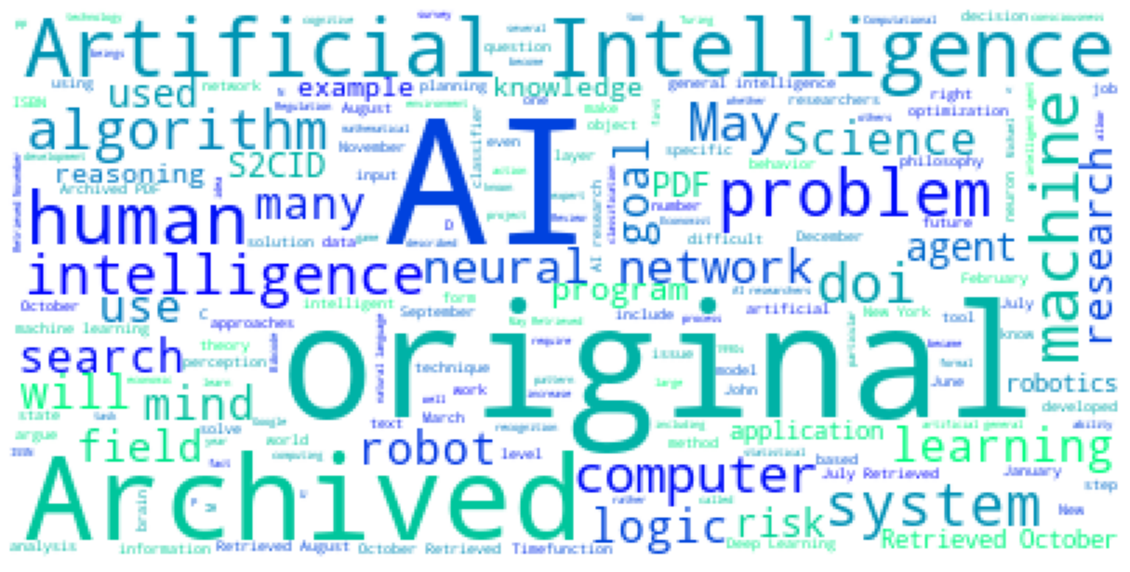

In [20]:
import wikipedia

wiki= wikipedia.search('artificial inteligence')
wiki= wikipedia.page(wiki[0])
text = wiki.content

stopwords=set(STOPWORDS)
wc= WordCloud(background_color='white',colormap='winter',stopwords=stopwords).generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [27]:
import requests
from pandas import DataFrame as
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

date = str(datetime.now())
date = date[:date.rfind(':')].replace(' ', '_')
date = date.replace(':','시') + '분'



query = input('검색 키워드를 입력하세요 : ')
news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : '))
query = query.replace(' ', '+')


news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')


news_dict = {}
idx = 0
cur_page = 1

print()
print('크롤링 중...')

while idx < news_num:
### 네이버 뉴스 웹페이지 구성이 바뀌어 태그명, class 속성 값 등을 수정함(20210126) ###
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1

    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')

print('크롤링 완료')

print('데이터프레임 변환')
news_df = DataFrame(news_dict).T

folder_path = os.getcwd()
xlsx_file_name = '네이버뉴스_{}_{}.xlsx'.format(query, date)

news_df.to_excel(xlsx_file_name)

print('엑셀 저장 완료 | 경로 : {}\\{}'.format(folder_path, xlsx_file_name))
os.startfile(folder_path)

검색 키워드를 입력하세요 : 대선
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 100

크롤링 중...
크롤링 완료
데이터프레임 변환
엑셀 저장 완료 | 경로 : C:\ssac\네이버뉴스_대선_2021-11-11_15시41분.xlsx


In [30]:
import pandas as pd
new=pd.read_excel('네이버뉴스_대선_2021-11-11_15시41분.xlsx')
new

,Unnamed: 0,title,url
0,0,대선후보 지지도 尹 39%·李 32%… 78%는 “반드시 투표”,http://news.kmib.co.kr/article/view.asp?arcid=...
1,1,대선 前 특검 급물살,https://view.asiae.co.kr/article/2021111110532...
2,2,"기본소득당 오준호, 대선 출마…""월 60만원 기본소득 보장""",http://www.newsis.com/view/?id=NISX20211111_00...
3,3,"靑 ""윤석열 등 野 대선후보에 다음주 문 대통령 축하난 전달""",https://imnews.imbc.com/news/2021/politics/art...
4,4,"靑, 내주 야권 대선후보 4명에 나란히 축하난 전달…15일 윤석열",https://www.news1.kr/articles/?4489918
...,...,...,...
95,95,대선후보 지지도···윤석열 46.2% 이재명 34.2% [리얼미터],https://www.khan.co.kr/politics/assembly/artic...
96,96,"이준석 “5년 후 대선 출마 이르다, 종로 보궐선거도 생각 없다”",https://www.chosun.com/politics/politics_gener...
97,97,"[윤태곤의 판] ""왜 대선후보 배우자에 이토록 주목하는가?""",https://www.nocutnews.co.kr/news/5654361
98,98,곽상도 사퇴에 내년 3·9 재보궐 미니총선급으로…대선 이기면 전승?,https://www.news1.kr/articles/?4490207


In [41]:
title=new['title']
title

0       대선후보 지지도 尹 39%·李 32%… 78%는 “반드시 투표”
1                               대선 前 특검 급물살
2         기본소득당 오준호, 대선 출마…"월 60만원 기본소득 보장"
3        靑 "윤석열 등 野 대선후보에 다음주 문 대통령 축하난 전달"
4      靑, 내주 야권 대선후보 4명에 나란히 축하난 전달…15일 윤석열
                      ...                  
95    대선후보 지지도···윤석열 46.2% 이재명 34.2% [리얼미터]
96     이준석 “5년 후 대선 출마 이르다, 종로 보궐선거도 생각 없다”
97        [윤태곤의 판] "왜 대선후보 배우자에 이토록 주목하는가?"
98    곽상도 사퇴에 내년 3·9 재보궐 미니총선급으로…대선 이기면 전승?
99           또 심사 연장된 차별금지법…대선 앞두고 다시 ‘신중론’
Name: title, Length: 100, dtype: object

In [51]:
title.to_csv('news_title.txt',index=False, header=False)

In [57]:
nt=open('news_title.txt',"r", encoding='utf-8')
text = nt.read()
text

'대선후보 지지도 尹 39%·李 32%… 78%는 “반드시 투표”\n대선 前 특검 급물살\n"기본소득당 오준호, 대선 출마…""월 60만원 기본소득 보장"""\n"靑 ""윤석열 등 野 대선후보에 다음주 문 대통령 축하난 전달"""\n"靑, 내주 야권 대선후보 4명에 나란히 축하난 전달…15일 윤석열"\n[전국지표조사] 대선주자 지지도 윤석열 39% 이재명 32%\n이재명 측 “조건부 특검 아냐…대선 전 특검 가능성 있어”\n민주 “사과 강제집행”… 5·18단체 “대선 위해 광주 이용”\n대선 열기 달아오르는 브라질…좌파 룰라 강세 속 3파전 예상\n"""임기 내 1인당 월 60만원""… \'용혜인 비서관\' 오준호 대선 출마"\n양당 대선후보 당선후 이재명-윤석열 첫 대면\n\'조국 수사\' 잇단 감찰...대선 정국 변수되나\n"대선 100일 앞둔 시점에···文, 두번째 \'국민과의 대화\'"\n"""임기 내 1인당 월 60만원""… \'용혜인 비서관\' 오준호 대선 출마"\n[대선주자 여론조사]\xa0 [NBS] 4자 대결 ‘윤석열39%-이재명32%-심상정·안철수5%’\n"靑, 내주 야권 대선후보 4명에 나란히 축하난 전달…15일 윤석열"\n"광주경찰, 내년 대선·지선 앞두고 선거사범 본격 단속"\n"윤석열, 5·18 인권운동가 홍남순 생가 방문 “대선 후보 중 처음”"\n"대선 출범식에 등장한 서빙로봇… 어, 중국산이네"\n"문 대통령, 대선 후보 윤석열에게 15일 ‘축하 난’ 보낸다"\n인사말하는 이재명 대선후보\n"두테르테 딸, 결국 대선 출마?…다바오 시장 출마 철회"\n美 동아태차관보 오늘 방한…종전선언 패싱하고 대선 주자 탐색?\n"인천상의-인천경실련, 대선 후보들에 9대 경제정책 제안"\n"이재명·윤석열, 대선 후보 확정 후 첫 공식 석상 만남"\n"윤석열 국민의힘 대선후보, 광주 5.18 묘지 참배…“상처받으신 분들께 머리숙여 사과”"\n"증시에도 대선 바람, 후보별 수혜주는"\n프랑스도 탄소 중립 위해 신규 원자로 건설…대선 후보들 원전 정책

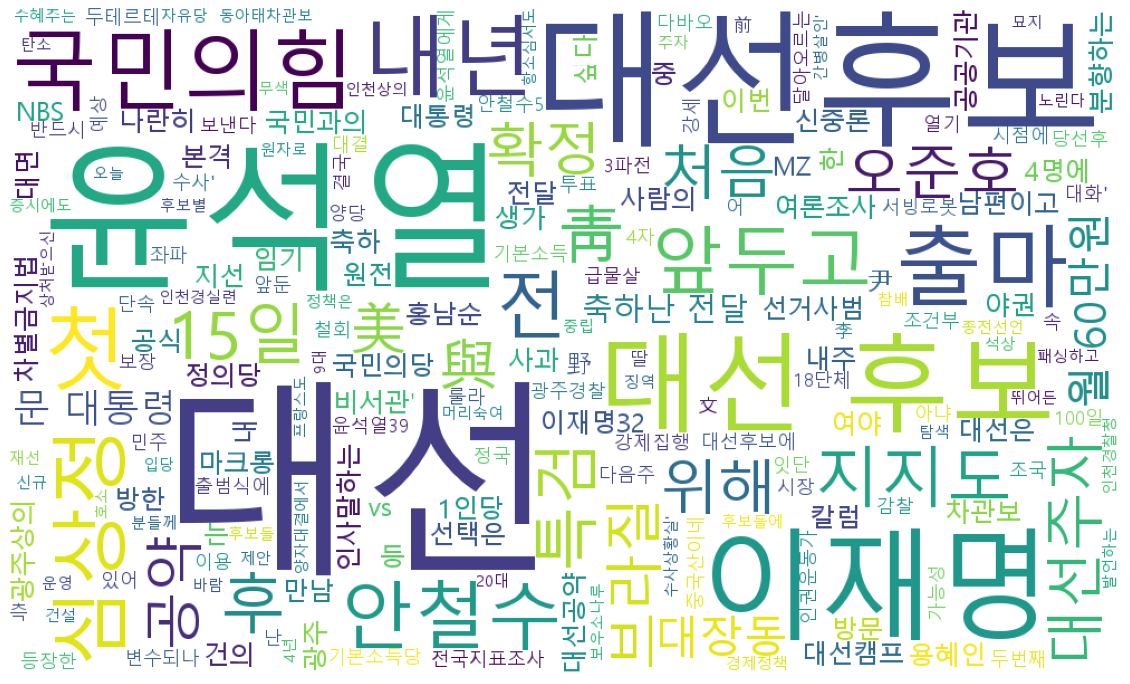

In [61]:
wc= WordCloud(width=1000,height=600, background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf")).generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis("off")
plt.show()